# scipy.optimize.minimize

Minimization of scalar function of one or more variables.

## Example 1

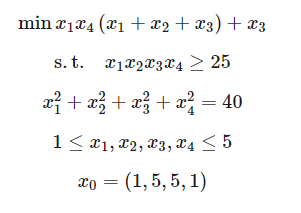

In [1]:
#Import libraries
import numpy as np
from scipy.optimize import minimize

In [2]:
#Objective function and two constraints
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

In [3]:
#Initial guess
x0 = [1,0,5,2]

print(objective(x0))

17


In [4]:
#setting boundries and constraints
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])

In [5]:
#The optimization problem is solved using the SLSQP method as:
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
solution

     fun: 17.014016990167626
     jac: array([14.57227278,  1.37940788,  2.37940788,  9.56415009])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.        , 4.74299805, 3.82115211, 1.37940796])

In [6]:
x = solution.x
# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Final Objective: 17.014016990167626
Solution
x1 = 1.0000000000000022
x2 = 4.742998047419429
x3 = 3.8211521095302565
x4 = 1.3794079624576872


## Example 2

Consider a minimization problem with several constraints:

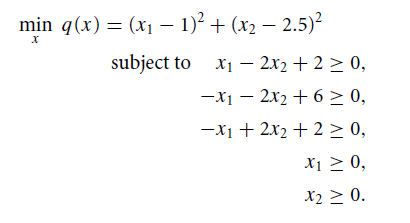

In [7]:
#The objective function is:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

In [8]:
#There are three constraints defined as:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

In [9]:
#And variables must be positive, hence the following bounds:
bnds = ((0, None), (0, None))

In [10]:
#The optimization problem is solved using the SLSQP method as:
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)

In [11]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

## Example 3

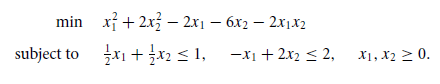

In [12]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    return x1**2 + 2*x2**2 - 2*x1 - 6*x2 - 2*x1*x2

def constraint1(x):
    return 0.5*x[0] + 0.5*x[1] - 1.0

def constraint2(x):
    return -x[0] + 2*x[1] - 2.0

In [13]:
x0 = [1,4]

print(objective(x0))

-1


In [14]:
#Variables must be positive, hence the following bounds:
bnds = ((0, None), (0, None))

In [15]:
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1,con2])

In [16]:
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [17]:
x = solution.x
# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))

Final Objective: -16.999999947714286
Solution
x1 = 5.000029779622875
x2 = 4.000175890264287
